In [1]:
# 手寫數字辨識 (以 CNN 模型)
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
np.random.seed(10) #fix random result

In [2]:
# 載入其他函式庫
import otherLib as olib
olib.solve_cudnn_error() # 處理 GPN memory 分配

1 Physical GPUs, 1 Logical GPUs


In [3]:
# 下載資料集
(x_train_image, y_train_label), (x_test_image,  y_test_label) = mnist.load_data()

In [4]:
# 將圖片binary data reshape 成 4 維矩陣(float)
x_train_4D = x_train_image.reshape(x_train_image.shape[0], 28, 28, 1).astype('float32')
x_test_4D  = x_test_image.reshape(x_test_image.shape[0], 28, 28, 1).astype('float32')

In [5]:
# 圖片標準化 
x_train_normalize = x_train_4D / 255
x_test_normalize  = x_test_4D  / 255

In [6]:
# 將標籤做成 One-hot encoding
y_train_oneHot = np_utils.to_categorical(y_train_label)
y_test_oneHot  = np_utils.to_categorical(y_test_label)

In [7]:
# 建立 CNN 模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()

In [8]:
# 建立捲積層
# filters: filters 數量 (16)
# kernel_size: filters 大小(5*5)
# padding: same(補齊周圍，捲積後大小不變)
# input_shape: 輸入層大小 (28*28*1)
# activation: 線性
model.add(Conv2D(
    filters = 16,
    kernel_size = (5,5),
    padding = 'same',
    input_shape = (28, 28, 1),
    activation = 'relu'
))

In [9]:
# 建立池化層
# pool_size: 池化層大小 (2*2)
model.add(MaxPooling2D(
    pool_size = (2,2)
))

In [10]:
# 建立捲積層 2
model.add(Conv2D(
    filters = 36,
    kernel_size = (5,5),
    padding = 'same',
    activation = 'relu'
))

In [11]:
# 建立池化層 2
# pool_size: 池化層大小 (2*2)
model.add(MaxPooling2D(
    pool_size = (2,2)
))

In [12]:
# 建立 Dropout
# 隨機放棄 25% 捲積結果
model.add(Dropout(0.25))

In [13]:
# 建立平坦層
model.add(Flatten())

In [14]:
# 建立隱藏層
# units: 128 層
# activation: 線性函數
model.add(Dense(
    units = 128,
    activation = 'relu'
    ))

In [15]:
# 建立輸出層
# units: 10 層
# activation: softmax機率向量
model.add(Dense(
    units = 10,
    activation = 'softmax'
))

In [16]:
# 顯示剛建立之模型
# 輸入 28*28，取樣 28*28 做 16 個
# 池化 (28*28) * (2*2) => (14*14)
# 上層 28*28 16 個，取樣 14*14 做 36 個
# 再次池化 (14*14) * (2*2) => (7*7)
# 平坦化 14*14*7 = 1764
# 225920 = 1764*128 + 128
# 1290 = 128*10 + 10
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [17]:
# 定義訓練方法
# loss: categorical_crossentropy 交叉熵
# optimizer: adam
# metrics: accuracy 準確率
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [18]:
# 開始訓練
# x,y: 輸入值
# validation_split: 0.2 資料作驗證； 0.8做訓練
# epochs: 10 次
# batch_size: 300 筆
train_history = model.fit(
    x = x_train_normalize,
    y = y_train_oneHot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 300
)
# loss, accuracy: 訓練資料(0.8)的 loss 與準確度
# val_loss, val_accuracy: 驗證資料(0.2)的 loss 與準確度

Epoch 1/10
160/160 [==============================] - 1s 7ms/step - accuracy: 0.8855 - loss: 0.3961 - val_accuracy: 0.9686 - val_loss: 0.1056
Epoch 2/10
160/160 [==============================] - 1s 6ms/step - accuracy: 0.9710 - loss: 0.0943 - val_accuracy: 0.9808 - val_loss: 0.0624
Epoch 3/10
160/160 [==============================] - 1s 6ms/step - accuracy: 0.9797 - loss: 0.0644 - val_accuracy: 0.9843 - val_loss: 0.0515
Epoch 4/10
160/160 [==============================] - 1s 6ms/step - accuracy: 0.9838 - loss: 0.0516 - val_accuracy: 0.9858 - val_loss: 0.0452
Epoch 5/10
160/160 [==============================] - 1s 6ms/step - accuracy: 0.9874 - loss: 0.0412 - val_accuracy: 0.9879 - val_loss: 0.0390
Epoch 6/10
160/160 [==============================] - 1s 6ms/step - accuracy: 0.9882 - loss: 0.0353 - val_accuracy: 0.9893 - val_loss: 0.0369
Epoch 7/10
160/160 [==============================] - 1s 6ms/step - accuracy: 0.9905 - loss: 0.0304 - val_accuracy: 0.9889 - val_loss: 0.0381
Epoch 

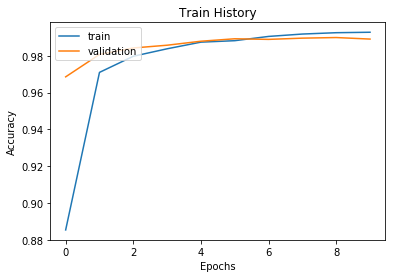

In [19]:
# 畫圖 
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Train History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
# 預測準確度
scores = model.evaluate(x_test_normalize, y_test_oneHot)
print()
print('accuracy=', scores[1])

313/313 [==============================] - 1s 2ms/step - accuracy: 0.9912 - loss: 0.0267

accuracy= 0.9911999702453613


In [21]:
# 預測值
prediction = np.argmax(model.predict(x_test_normalize), axis=-1)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

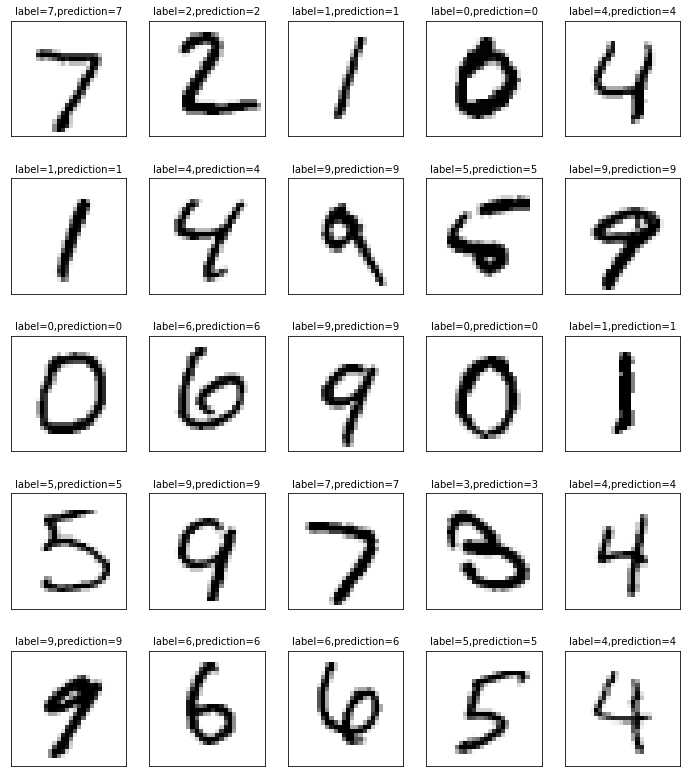

In [22]:
# 預測結果
olib.plot_prediction(x_test_image, y_test_label, prediction, 0)

In [23]:
# 建立混淆矩陣
pd.crosstab(
    y_test_label,
    prediction,
    rownames = ['label'],
    colnames = ['prediction']
)

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,1,1,0,0
1,0,1132,1,0,0,0,1,1,0,0
2,3,4,1023,0,0,0,0,1,1,0
3,1,0,1,1006,0,2,0,0,0,0
4,0,0,0,0,979,0,0,0,1,2
5,2,0,0,6,0,875,6,1,0,2
6,2,2,0,0,1,1,951,0,1,0
7,0,3,5,1,0,0,0,1018,1,0
8,3,0,1,1,1,1,2,1,960,4
